<a href="https://colab.research.google.com/github/faridLim/Data-analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt

In [ ]:
start_date = '2018-12-28'
end_date = '2021-05-31'
needed_date = '2017-12-05'

In [ ]:
df_stock = pd.read_excel("etf_close.xlsx", index_col = 0)
df_volume = pd.read_excel("etf_volume.xlsx", index_col = 0)

In [ ]:
df_volume = df_volume.fillna(0)

In [ ]:
columns_lst = df_stock.columns
date = df_stock.T.columns
date_list = []
score_list = []

In [ ]:
for i in range(len(date)):
    ts = date[i].date()
    date_list.append(str(ts))

start_date_idx = date_list.index('2018-12-28')
end_date_idx = date_list.index('2021-05-31')

In [ ]:
df_high52= pd.DataFrame()
for i in range(columns_lst.shape[0]):
    high52 = df_stock[columns_lst[i]].asfreq('D').rolling(window=52 * 7, min_periods=1).max()
    df_high52[columns_lst[i]] = high52

In [ ]:
df_merge = pd.merge(df_stock,df_high52, how= 'left', on = 'date')
df_merge = df_merge.filter(regex = '_y')
df_merge.columns = columns_lst
#df_merge.to_excel('etf_high52.xlsx')

In [ ]:
boxScore_df = pd.DataFrame(columns= columns_lst)
gapScore_df = pd.DataFrame(columns= columns_lst)
volumeScore_df = pd.DataFrame(columns= columns_lst)

In [ ]:
boxScore_lis = []
gapScore_lst = []
volumeScore_lst = []

In [ ]:
def high52_check():
    avg_stockprice = df_stock[name][start_date_idx-1-260:start_date_idx-1].mean()

    before3month_df_stock = df_stock.iloc[start_date_idx - 20 *3-1 :start_date_idx-1][name]
    before3month_df_merge = df_merge.iloc[start_date_idx - 20 *3-1 :start_date_idx-1][name]

    before3month_df_stock = pd.DataFrame(before3month_df_stock)
    before3month_df_merge = pd.DataFrame(before3month_df_merge)
    df_filter1 = pd.concat([before3month_df_stock, before3month_df_merge], axis =1)
    df_filter1.columns= ['close', '52high']
    df_filter1.reset_index(inplace = True)

    for i in range(df_filter1.shape[0]):
    
        if df_filter1.loc[i, 'close'] < df_filter1.loc[i, '52high'] and avg_stockprice < df_filter1.loc[i, 'close']:
            box_point.append(1)
        else:
            box_point.append(-1)

    df_filter1['box_point'] = box_point
    sum_box_point = sum(box_point)
    c.append([name,sum_box_point])
    # sorted_c_list = sorted(c, key=lambda x: -x[1])
    box_point.clear()

main

In [ ]:
for date_idx in range(start_date_idx,len(date_list)):
    i = 0
    a = [] # df_high52 만들 때 사용
    b = [] # 52주 신고가 여력 트리거
    c = [] # point 계산
    box_point = []
    point_vol = [] # volume에 대한 point
    filter2_columns_lst = [] # 필터링2 이후 리스트
    gap_list = [] # 52주 신고가 대비 현재 주가가 얼마나 근접하였는지
    filter3_columns_lst = [] # 필터링 3 이후 리스트
    start_date_idx = date_idx

    #52_check , boxscore
    for k in range(len(columns_lst)):
        b.clear()
        name = columns_lst[k]
        for i in range(100): # 20일 x 5개월
            after_value = df_merge.iloc[start_date_idx-i-1][name]
            before_value = df_merge.iloc[start_date_idx-1-i-1][name]
            if after_value != before_value:
                b.append(1)
        if 1 in b:
            high52_check()
        else:
            c.append([name,-50])


    box_score = c
    
    #gap score
    for i in range(len(columns_lst)):
        high = df_merge[columns_lst[i]][start_date_idx-2]
        close_price = df_stock[columns_lst[i]][start_date_idx-1]
        gap = (high-close_price) / high
        
        if gap < 0:
            gap = -gap
    
        gap_list.append([columns_lst[i],gap])

    
    #volume score
    for i in range(len(columns_lst)):
        if df_volume[columns_lst[i]][start_date_idx-1] == 0:
            vol_point = 0
            point_vol.append([columns_lst[i], vol_point])
            continue
        
        for k in range(260): # 52주 x 5일
            after_value_idx = start_date_idx-4-k
            after_value = df_merge.iloc[after_value_idx][columns_lst[i]]
            before_value = df_merge.iloc[after_value_idx-1][columns_lst[i]]
            if after_value != before_value:
                A_vol = df_volume[columns_lst[i]][after_value_idx-2] +  df_volume[columns_lst[i]][after_value_idx-1]
                +  df_volume[columns_lst[i]][after_value_idx] +  df_volume[columns_lst[i]][after_value_idx+1]
                +  df_volume[columns_lst[i]][after_value_idx+2]
                filter_vol = df_volume[columns_lst[i]][start_date_idx-1]

                if A_vol > filter_vol > A_vol * 0.5:
                    vol_point = 2
                    point_vol.append([columns_lst[i], vol_point])
                    break
                if A_vol * 0.5 > filter_vol:
                    vol_point = 1
                    point_vol.append([columns_lst[i], vol_point])
                    break
                if filter_vol > A_vol:
                    vol_point = 0
                    point_vol.append([columns_lst[i], vol_point])
                    break
            
     #box scrore 정규화#
    boxscore_df = pd.DataFrame(box_score)
    boxscore_df.columns = ['name', date_list[date_idx]]
    box_mean = boxscore_df.describe().at['mean', date_list[date_idx]]
    box_std = boxscore_df.describe().at['std', date_list[date_idx]]
    boxscore_df[date_list[date_idx]] = (boxscore_df[date_list[date_idx]] - box_mean) / box_std
    boxscore_df.set_index('name', inplace = True)
    boxscore_df = boxscore_df.T
   

    #gap_score 정규화#
    gapscore_df = pd.DataFrame(gap_list)
    gapscore_df.columns = ['name', date_list[date_idx]]
    gapscore_mean = gapscore_df.describe().at['mean', date_list[date_idx]]
    gapscore_std = gapscore_df.describe().at['std', date_list[date_idx]]
    gapscore_df[date_list[date_idx]] = (gapscore_df[date_list[date_idx]] - gapscore_mean) / gapscore_std

    gapscore_df.set_index('name', inplace = True)
    gapscore_df = gapscore_df.T
    

    #point_vol 정규화#
    point_vol_df = pd.DataFrame(point_vol)
    point_vol_df.columns = ['name', date_list[date_idx]]
    point_vol_mean = point_vol_df.describe().at['mean', date_list[date_idx]]
    point_vol_std = point_vol_df.describe().at['std', date_list[date_idx]]
    if point_vol_std == 0:
        point_vol_df[date_list[date_idx]] = 0
    else:
        point_vol_df[date_list[date_idx]] = (point_vol_df[date_list[date_idx]] - point_vol_mean) / point_vol_std

    point_vol_df.set_index('name', inplace = True)
    point_vol_df = point_vol_df.T
    

    score_df = boxscore_df - gapscore_df + point_vol_df
    score_df = score_df.T
    
    score_list.append(score_df)
        

In [ ]:
score_list = pd.concat(score_list, axis = 1)
score_t = score_list.T
score_t.head()

name,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
2018-12-28,-0.269814,-3.776560,3.471686,-0.081045,0.125869,4.989340,-0.279943,4.647595,-1.513311,-2.372010,2.190453,0.246210,0.625344,-0.157907,0.414755,0.203856,2.962254,-0.811361,-0.250899,-0.438590,-0.311847,0.078701,-0.040910,-0.043442,0.609657,1.430405,-0.539957,-0.130525,0.229457,2.072683,-0.123142,-1.051514,0.142196,0.130545,-1.572267,3.336839,3.976779,-1.003872,-0.070751,0.085066,...,0.121718,-1.844077,0.187481,-0.977154,-0.002599,2.266385,3.057957,0.471490,1.686941,2.126741,5.426478,2.628336,1.175804,1.831627,2.178706,1.407767,1.492283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.403709,-1.958489,3.416143,-0.248550,-0.027297,4.829365,-0.440245,4.443730,-1.651677,-0.612354,1.989982,0.051795,0.408616,-0.311382,0.300597,0.026295,2.788121,-1.044234,-0.408589,-0.628463,-0.454492,-0.040981,-0.196037,-0.285222,0.496117,1.267091,-0.671875,-0.276084,0.111595,1.833607,-0.332338,-1.206365,0.008351,0.049686,0.225429,3.161513,3.766893,-1.165797,-0.285116,1.950921,...,-0.016978,-2.088575,0.024318,0.848768,1.865088,0.148348,2.891565,0.301834,1.515700,1.186425,3.291466,2.516797,1.006732,1.712379,0.046247,-0.644192,1.392400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.393643,-3.730141,3.543022,-0.229014,0.150637,4.851008,-0.450023,4.571857,-1.626744,1.286980,2.033428,-1.738826,0.340091,-0.312776,0.136128,-0.025789,2.653390,-1.038599,-0.507288,-0.608049,-0.452752,-0.069457,-0.229373,-0.205109,2.434187,1.255886,-0.675962,1.527674,0.060071,1.791442,-0.333927,-1.241799,0.111536,0.050640,0.216333,4.976870,3.757820,-1.093396,-0.273713,-0.098408,...,-0.069602,-1.871722,-1.858116,-1.057068,-0.104893,0.123019,3.087210,0.370003,1.531713,1.219082,3.315965,4.517504,0.793183,1.716150,0.150530,1.331487,1.274470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.273796,-3.907336,3.723573,-0.184478,0.596659,4.904003,-0.324033,4.624798,-1.574364,-0.337794,2.075603,0.210618,0.276712,-0.250393,0.394549,0.081419,2.922876,-0.859446,-0.531842,-0.661852,-0.314433,0.041660,-0.072603,-0.214024,0.660741,1.225078,-0.682419,1.691619,0.088086,1.775580,-0.218996,-1.174212,0.081570,0.095581,2.311199,3.048844,3.738579,-1.007590,-0.244625,-0.113681,...,0.030957,-1.985245,0.039667,2.807087,-2.166333,0.168974,5.021796,-1.555610,1.573383,1.270423,3.425972,2.659797,0.823112,1.585744,0.020277,1.310481,1.263091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.442634,-0.161640,5.613320,-0.242692,0.475824,4.850029,-0.325758,4.480406,-1.627917,-0.363867,1.940621,0.165732,0.120351,-0.351254,0.502562,-0.011312,3.025598,-0.899062,-0.634350,-0.774722,-0.464339,0.043629,-0.018144,-0.358170,2.521720,1.074593,-0.623647,-0.349040,0.043154,1.632967,-0.245602,-1.241785,-0.013967,0.018588,0.302470,3.014064,3.612445,-1.026827,-0.290897,-2.124979,...,-0.065786,-2.036808,-0.060444,2.724896,-0.233191,0.097873,2.976574,0.496332,1.501319,1.214877,3.422090,4.608501,0.656516,1.671949,0.052132,1.352442,1.287275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#마이너스 스코어 0점화
for i in range(len(columns_lst)):
        score_t[columns_lst[i]] = score_t[columns_lst[i]].apply(lambda x: 0 if x < 0 else x)

In [ ]:
score_t.to_csv("score_T.csv")

기간별 스코어파악

In [ ]:
score = pd.read_csv('score_T.csv')

In [ ]:
score.index = pd.to_datetime(score["Unnamed: 0"])
score.drop(["Unnamed: 0"],axis=1,inplace = True)

In [ ]:
daily_score = score.iloc[:, ]
daily_score.head()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-28,0.0,0.0,3.471686,0.0,0.125869,4.989340,0.0,4.647595,0.0,0.00000,2.190453,0.246210,0.625344,0.0,0.414755,0.203856,2.962254,0.0,0.0,0.0,0.0,0.078701,0.0,0.0,0.609657,1.430405,0.0,0.000000,0.229457,2.072683,0.0,0.0,0.142196,0.130545,0.000000,3.336839,3.976779,0.0,0.0,0.085066,...,0.121718,0.0,0.187481,0.000000,0.000000,2.266385,3.057957,0.471490,1.686941,2.126741,5.426478,2.628336,1.175804,1.831627,2.178706,1.407767,1.492283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.0,0.0,3.416143,0.0,0.000000,4.829365,0.0,4.443730,0.0,0.00000,1.989982,0.051795,0.408616,0.0,0.300597,0.026295,2.788121,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.496117,1.267091,0.0,0.000000,0.111595,1.833607,0.0,0.0,0.008351,0.049686,0.225429,3.161513,3.766893,0.0,0.0,1.950921,...,0.000000,0.0,0.024318,0.848768,1.865088,0.148348,2.891565,0.301834,1.515700,1.186425,3.291466,2.516797,1.006732,1.712379,0.046247,0.000000,1.392400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.0,0.0,3.543022,0.0,0.150637,4.851008,0.0,4.571857,0.0,1.28698,2.033428,0.000000,0.340091,0.0,0.136128,0.000000,2.653390,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.434187,1.255886,0.0,1.527674,0.060071,1.791442,0.0,0.0,0.111536,0.050640,0.216333,4.976870,3.757820,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.123019,3.087210,0.370003,1.531713,1.219082,3.315965,4.517504,0.793183,1.716150,0.150530,1.331487,1.274470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,0.0,0.0,3.723573,0.0,0.596659,4.904003,0.0,4.624798,0.0,0.00000,2.075603,0.210618,0.276712,0.0,0.394549,0.081419,2.922876,0.0,0.0,0.0,0.0,0.041660,0.0,0.0,0.660741,1.225078,0.0,1.691619,0.088086,1.775580,0.0,0.0,0.081570,0.095581,2.311199,3.048844,3.738579,0.0,0.0,0.000000,...,0.030957,0.0,0.039667,2.807087,0.000000,0.168974,5.021796,0.000000,1.573383,1.270423,3.425972,2.659797,0.823112,1.585744,0.020277,1.310481,1.263091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,0.0,0.0,5.613320,0.0,0.475824,4.850029,0.0,4.480406,0.0,0.00000,1.940621,0.165732,0.120351,0.0,0.502562,0.000000,3.025598,0.0,0.0,0.0,0.0,0.043629,0.0,0.0,2.521720,1.074593,0.0,0.000000,0.043154,1.632967,0.0,0.0,0.000000,0.018588,0.302470,3.014064,3.612445,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,2.724896,0.000000,0.097873,2.976574,0.496332,1.501319,1.214877,3.422090,4.608501,0.656516,1.671949,0.052132,1.352442,1.287275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
daily_score = score.iloc[:, ]
weekly_score = score.resample('W').last().iloc[:, ]
monthly_score = score.resample('M').last().iloc[:, ]

daily_summary, daily_ress = get_report(score)
daily_ress.plot(figsize = (12, 6))
daily_summary

weekly_summary, weekly_ress = get_report(weekly_score)
weekly_ress.plot(figsize = (12, 6))
weekly_summary

monthly_summary, monthly_ress = get_report(monthly_score)
monthly_ress.plot(figsize = (12, 6))
monthly_summary

In [ ]:
daily_score.to_csv("daily_score.csv")

In [ ]:
weekly_score = score.resample('W').last().iloc[:, ]
weekly_score.tail()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-30,0.633234,0.647752,0.821679,1.413665,1.270377,2.960980,0.796487,0.0,1.172699,1.583456,1.302550,0.147783,0.894416,1.040492,0.974011,0.892926,0.898125,0.0,0.864513,0.550675,0.732662,1.036024,0.944641,0.612599,0.0,0.904627,0.0,0.867803,0.921563,0.0,1.399758,0.826217,0.0,1.002089,0.000000,1.221531,1.184958,1.126692,1.175789,1.010205,...,0.924014,1.322388,0.000000,0.000000,0.892288,1.363626,0.0,0.507286,0.0,0.000000,0.0,0.0,1.215394,0.0,1.360511,1.500945,1.367661,1.536730,0.0,0.221141,0.000000,0.658252,0.000000,0.737917,0.237974,0.0,0.403614,0.0,0.772793,1.245204,0.0,0.0,0.0,0.000000,3.979915,0.0,0.000000,0.000000,0.000000,2.995625
2021-06-06,0.755059,0.667056,0.354106,1.408490,0.908276,0.000000,0.580803,0.0,1.399210,1.329932,1.029253,0.541298,0.832922,1.020729,1.187000,0.678272,0.730955,0.0,0.761043,0.467699,0.849702,0.858126,4.870799,0.506285,0.0,0.706576,0.0,0.904344,0.555548,0.0,1.263364,0.796777,0.0,0.000000,4.505936,4.428623,0.888732,0.763733,1.134355,0.654781,...,0.649123,1.285633,1.181067,0.559206,0.860499,1.361237,0.0,0.398890,0.0,1.346036,0.0,0.0,0.851703,0.0,1.279698,1.491867,1.354192,1.211367,0.0,0.000000,0.000000,0.505348,0.000000,0.508559,0.042449,0.0,0.086935,0.0,0.689536,1.197721,0.0,0.0,0.0,0.000000,3.919214,0.0,0.000000,0.000000,0.000000,0.000000
2021-06-13,0.798244,0.515172,0.453302,1.455996,1.137282,2.429448,0.602724,0.0,1.339652,1.370226,1.281011,0.858424,0.919511,0.998328,1.323250,0.468307,0.000000,0.0,0.773018,0.386538,0.851623,0.000000,1.321316,0.533173,0.0,0.882883,0.0,0.845057,0.710071,0.0,1.683216,0.662780,0.0,1.141207,0.841732,0.890266,0.911835,0.867545,1.308748,0.821630,...,0.629596,1.338054,1.211890,0.725485,0.935169,1.405967,0.0,0.555855,0.0,0.000000,0.0,0.0,0.976369,0.0,1.502258,1.528468,1.399576,1.140138,0.0,0.185911,0.000000,0.755332,0.000000,0.936987,0.443848,0.0,0.135444,0.0,1.075692,1.281296,0.0,0.0,0.0,0.000000,0.266645,0.0,0.000000,0.000000,2.570336,0.000000
2021-06-20,1.085550,0.776877,0.583550,1.634172,1.157568,0.000000,0.618364,0.0,1.605927,1.356017,1.464745,0.389729,1.039820,1.235562,0.000000,0.742633,0.000000,0.0,1.131073,0.682570,5.577713,0.000000,0.000000,0.379901,0.0,0.826268,0.0,1.144297,0.902320,0.0,1.590426,0.718650,0.0,0.000000,1.025329,0.628997,0.861516,0.609296,1.609571,0.620136,...,0.759130,1.509303,1.509076,0.000000,1.223624,1.572084,0.0,0.507485,0.0,0.000000,0.0,0.0,1.415132,0.0,1.451418,1.711346,1.568611,1.262677,0.0,0.496306,2.986977,1.023977,0.000000,0.992431,0.746780,0.0,0.576830,0.0,1.401049,1.456802,0.0,0.0,0.0,0.000000,0.662887,0.0,0.000000,0.000000,0.000000,0.000000
2021-06-27,0.974158,0.803426,0.682291,0.000000,1.252291,0.000000,0.691042,0.0,0.000000,1.456652,1.547124,0.435431,0.000000,1.419377,0.000000,0.986638,0.378514,0.0,1.192804,0.000000,0.952943,0.000000,0.000000,0.282815,0.0,4.747975,0.0,1.357933,0.926630,0.0,1.573578,0.808246,0.0,1.388555,1.036722,0.834345,0.977802,0.622406,1.682248,0.636654,...,0.916389,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.631000,0.0,5.493509,0.0,0.0,1.578008,0.0,1.478159,1.822057,0.000000,1.328374,0.0,0.669803,0.000000,1.130550,3.812997,1.073348,1.012238,0.0,0.894606,0.0,1.431493,1.490616,0.0,0.0,0.0,0.055373,0.875399,0.0,0.108153,0.147182,0.000000,0.000000


In [ ]:
weekly_score.to_csv("weekly_score.csv")

In [ ]:
monthly_score = score.resample('M').last().iloc[:, ]
monthly_score.head()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-31,0.0,0.0,3.471686,0.000000,0.125869,4.989340,0.000000,4.647595,0.0,0.0,2.190453,0.246210,0.625344,0.000000,0.414755,0.203856,2.962254,0.0,0.0,0.000000,0.0,0.078701,0.000000,0.0,0.609657,1.430405,0.0,0.0,0.229457,2.072683,0.00000,0.0,0.142196,0.130545,0.000000,3.336839,3.976779,0.000000,0.0,0.085066,...,0.121718,0.000000,0.187481,0.000000,0.000000,2.266385,3.057957,0.471490,1.686941,2.126741,5.426478,2.628336,1.175804,1.831627,2.178706,1.407767,1.492283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,0.0,0.0,1.332899,0.071944,0.783890,4.886255,0.000000,1.950377,0.0,0.0,1.076490,0.369056,1.147934,0.000000,1.060878,0.362042,4.051297,0.0,0.0,0.254867,0.0,0.000000,0.333639,0.0,0.000000,1.043554,0.0,0.0,0.000000,3.587761,0.00000,0.0,0.043437,0.000000,0.422864,3.507969,3.579143,0.844366,0.0,0.291332,...,0.000000,0.674617,0.508507,1.206811,0.000000,0.730253,2.694674,0.529833,1.703195,1.391355,4.112705,3.147458,0.351841,4.649609,3.313678,1.897642,1.992814,1.331144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,0.0,0.0,0.563655,0.031333,2.437369,4.750877,0.260069,3.497540,0.0,0.0,1.196806,0.000000,0.282554,0.694857,0.844537,0.000000,4.004300,0.0,0.0,0.554419,0.0,0.000000,0.355191,0.0,2.473253,0.971019,0.0,0.0,0.000000,1.288312,0.00000,0.0,0.646263,0.000000,0.833516,3.497526,3.341353,2.139856,0.0,0.379078,...,0.000000,0.000000,0.151640,1.000760,0.090303,0.508826,3.331044,1.091509,1.570479,1.114833,4.370465,3.952810,0.000000,2.293726,3.190955,2.170101,0.014743,3.920874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,0.0,0.0,0.079754,0.000000,3.477844,4.748119,1.384875,1.595183,0.0,0.0,0.960868,0.000000,2.660730,2.051108,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.966161,0.0,3.450836,0.877345,0.0,0.0,2.316661,0.997410,0.00000,0.0,0.506171,0.000000,2.663201,3.352357,3.212543,1.821658,0.0,1.190076,...,0.000000,0.000000,0.000000,2.467211,0.000000,0.000000,4.376430,0.736115,1.357024,0.825805,6.505545,4.251248,0.000000,2.462905,2.464800,2.688038,0.617422,2.177748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,0.0,0.0,0.000000,0.000000,3.154644,3.429282,2.294013,0.840817,0.0,0.0,2.346695,0.000000,2.747990,4.156606,0.535750,0.000000,0.000000,0.0,0.0,1.475451,0.0,0.000000,3.723182,0.0,2.270779,0.779748,0.0,0.0,3.008031,0.432128,0.57347,0.0,0.088806,0.000000,4.536330,2.744088,2.478680,2.323877,0.0,0.245567,...,0.000000,0.000000,0.274846,1.796777,0.000000,0.000000,5.008809,0.000000,0.750674,0.216190,3.216993,3.014707,0.000000,2.228310,1.955157,2.861716,1.062533,0.000000,0.483734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
monthly_score.to_csv("monthly_score.csv")

In [ ]:
from magi_module.py import get_report

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.157154,1.309560,1.492688,1.632020,1.510294,1.230104,1.204522
MDD,-0.422664,-0.414267,-0.229469,-0.295194,-0.172593,-0.229225,-0.214437
TURNOVER,88.345710,113.792638,181.370558,175.646033,117.215312,205.561021,174.981194
CAGR,0.049858,0.094062,0.142851,0.177358,0.147327,0.071471,0.063992
SHARPE,0.090752,0.143374,0.260520,0.278948,0.330092,0.129965,0.138306


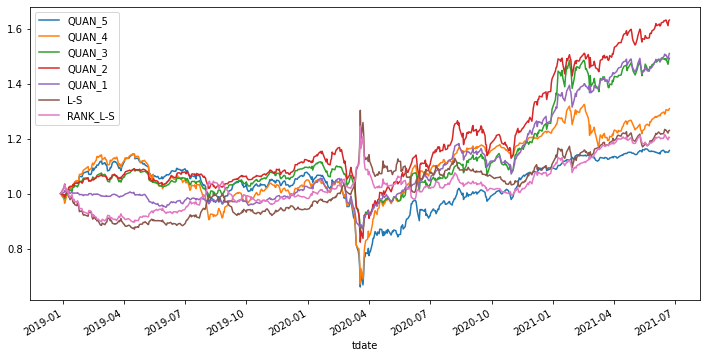

In [ ]:
daily_summary, daily_ress = get_report(score)
daily_ress.plot(figsize = (12, 6))
daily_summary

In [ ]:
daily_summary.to_csv("daily_summary.csv")

In [ ]:
daily_ress.to_csv("daily_ress.csv")

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.134563,1.405441,1.551322,1.607086,1.483127,1.232179,1.166351
MDD,-0.415887,-0.374158,-0.202611,-0.280338,-0.248107,-0.217638,-0.202096
TURNOVER,22.089123,30.877000,51.694019,50.481829,31.675004,53.764126,46.481192
CAGR,0.042980,0.120136,0.157623,0.171331,0.140406,0.072074,0.052632
SHARPE,0.080311,0.183273,0.291114,0.270614,0.302063,0.132236,0.119877


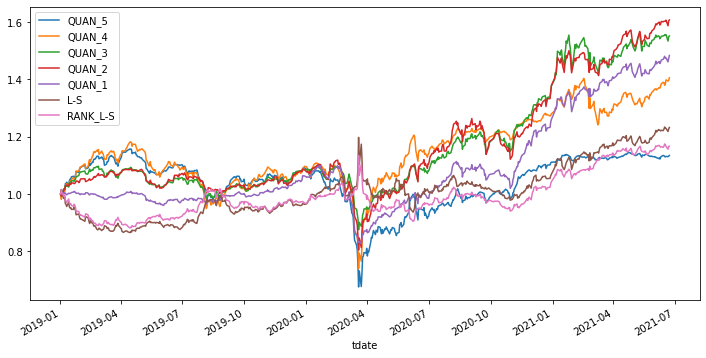

In [ ]:
weekly_summary, weekly_ress = get_report(weekly_score)
weekly_ress.plot(figsize = (12, 6))
weekly_summary

In [ ]:
weekly_summary.to_csv("weekly_summary.csv")

In [ ]:
weekly_ress.to_csv("weekly_ress.csv")

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.188713,1.272956,1.416089,1.749224,1.560260,1.251286,1.247277
MDD,-0.411331,-0.350429,-0.260765,-0.263792,-0.257350,-0.184728,-0.150196
TURNOVER,8.040163,11.192650,18.841404,17.986013,12.924218,20.964381,17.479044
CAGR,0.059316,0.083772,0.122958,0.204893,0.159842,0.077587,0.076435
SHARPE,0.104956,0.144042,0.217121,0.322266,0.330247,0.152667,0.185559


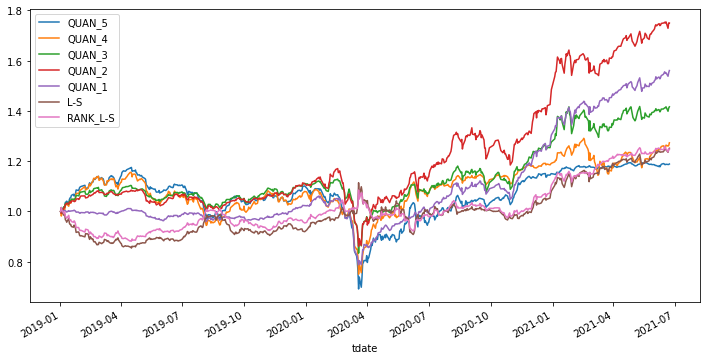

In [ ]:
monthly_summary, monthly_ress = get_report(monthly_score)
monthly_ress.plot(figsize = (12, 6))
monthly_summary

In [ ]:
monthly_summary.to_csv("monthly_summary.csv")

In [ ]:
monthly_ress.to_csv("monthly_res.csv")